In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../data/airbnb_listings.csv')

In [3]:
df.shape

(5836, 75)

In [4]:
df.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,177,https://www.airbnb.com/rooms/177,20220926045611,2022-09-26,city scrape,Tiny Home in the Heart of the City- ECO FRIENDLY,"160 sq ft + 80 sq ft loft for sleeping, Sleeps...","Quiet neighborhood next to park, creeks and bi...",https://a0.muscache.com/pictures/a1745ab2-b3a0...,615,...,4.94,4.85,4.78,2016-BFN-0004968,f,2,2,0,0,1.63
1,360,https://www.airbnb.com/rooms/360,20220926045611,2022-09-26,city scrape,Sit in the Peaceful Garden of the Chickadee Co...,Enjoy the famous Colorado weather and unplug i...,The cottage is located in the center of Lower ...,https://a0.muscache.com/pictures/monet/Select-...,666,...,5.00,5.00,4.91,2017-BFN-0002177,f,2,2,0,0,3.43
2,364,https://www.airbnb.com/rooms/364,20220926045611,2022-09-26,city scrape,Lodo / RiNo LOFT via airport train,"Modern 1,000 square foot loft in the heart of ...","Ten brewpubs within walking distance, two grea...",https://a0.muscache.com/pictures/11766413/a2c5...,783,...,4.96,4.65,4.71,NaN,f,1,1,0,0,0.53
3,590,https://www.airbnb.com/rooms/590,20220926045611,2022-09-26,city scrape,Comfortable - and a great value!,"Large guest room in my home, where I also live...",I love the diversity of my neighborhood and it...,https://a0.muscache.com/pictures/110931/30991c...,933,...,4.95,4.75,4.85,2021-BFN-0000578,f,2,0,2,0,4.08
4,592,https://www.airbnb.com/rooms/592,20220926045611,2022-09-26,previous scrape,private,This room is in the basement. It does not hav...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,933,...,4.94,4.80,4.86,2021-BFN-0000578,f,2,0,2,0,1.01


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5836 entries, 0 to 5835
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            5836 non-null   int64  
 1   listing_url                                   5836 non-null   object 
 2   scrape_id                                     5836 non-null   int64  
 3   last_scraped                                  5836 non-null   object 
 4   source                                        5836 non-null   object 
 5   name                                          5836 non-null   object 
 6   description                                   5808 non-null   object 
 7   neighborhood_overview                         4181 non-null   object 
 8   picture_url                                   5836 non-null   object 
 9   host_id                                       5836 non-null   i

In [6]:
df.duplicated().sum()

0

In [7]:
df.isnull().sum()

id                                                0
listing_url                                       0
scrape_id                                         0
last_scraped                                      0
source                                            0
                                               ... 
calculated_host_listings_count                    0
calculated_host_listings_count_entire_homes       0
calculated_host_listings_count_private_rooms      0
calculated_host_listings_count_shared_rooms       0
reviews_per_month                               862
Length: 75, dtype: int64

In [8]:
df['neighbourhood'].value_counts()

Denver, Colorado, United States               3651
Aurora, Colorado, United States                137
Wheat Ridge, Colorado, United States           106
Lakewood, Colorado, United States              106
Englewood, Colorado, United States              59
Littleton, Colorado, United States              43
Arvada, Colorado, United States                 39
Edgewater, Colorado, United States              22
Greenwood Village, Colorado, United States       5
Centennial, Colorado, United States              4
Wheat ridge, Colorado, United States             2
Commerce City, Colorado, United States           2
Stapleton, Denver, Colorado, United States       1
Denver , Colorado, United States                 1
Denver , Co, United States                       1
Denver, United States                            1
Glendale, Colorado, United States                1
Name: neighbourhood, dtype: int64

In [9]:
df['neighbourhood'] = df['neighbourhood'].replace('Wheat ridge, Colorado, United States', 'Wheat Ridge, Colorado, United States')
df['neighbourhood'] = df['neighbourhood'].replace('Stapleton, Denver, Colorado, United States', 'Denver, Colorado, United States')
df['neighbourhood'] = df['neighbourhood'].replace('Denver , Colorado, United States', 'Denver, Colorado, United States')
df['neighbourhood'] = df['neighbourhood'].replace('Denver , Co, United States', 'Denver, Colorado, United States')
df['neighbourhood'] = df['neighbourhood'].replace('Denver, United States', 'Denver, Colorado, United States')
df['neighbourhood'] = df['neighbourhood'].replace('Glendale, Colorado, United States', 'Denver, Colorado, United States')
df['neighbourhood'] = df['neighbourhood'].str.replace(', Colorado, United States', '')

In [12]:
df['neighbourhood'].value_counts()

Denver               3656
Aurora                137
Wheat Ridge           108
Lakewood              106
Englewood              59
Littleton              43
Arvada                 39
Edgewater              22
Greenwood Village       5
Centennial              4
Commerce City           2
Name: neighbourhood, dtype: int64

In [13]:
denver = df[df['neighbourhood'] == 'Denver']

In [14]:
df['neighbourhood_cleansed'].value_counts()

Five Points          404
Highland             336
West Colfax          230
West Highland        208
Stapleton            206
                    ... 
Southmoor Park        11
Harvey Park South     10
Wellshire              6
Auraria                3
Sun Valley             1
Name: neighbourhood_cleansed, Length: 78, dtype: int64

In [15]:
denver['neighbourhood_cleansed'].value_counts()

Five Points      313
Highland         238
West Colfax      163
Union Station    133
West Highland    127
                ... 
Lowry Field        8
Bear Valley        6
DIA                4
Fort Logan         3
Auraria            3
Name: neighbourhood_cleansed, Length: 73, dtype: int64

/Users/lmarett8/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


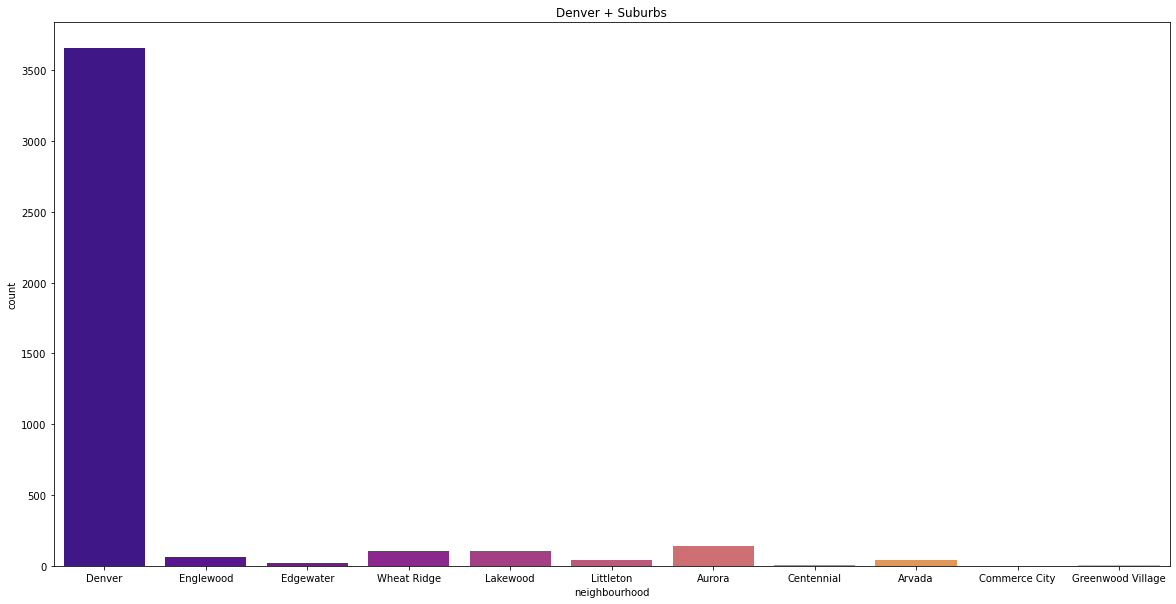

In [16]:
sns.countplot(df['neighbourhood'], palette = 'plasma')
fig = plt.gcf()
fig.set_size_inches(20,10)
plt.title('Denver + Suburbs');

/Users/lmarett8/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


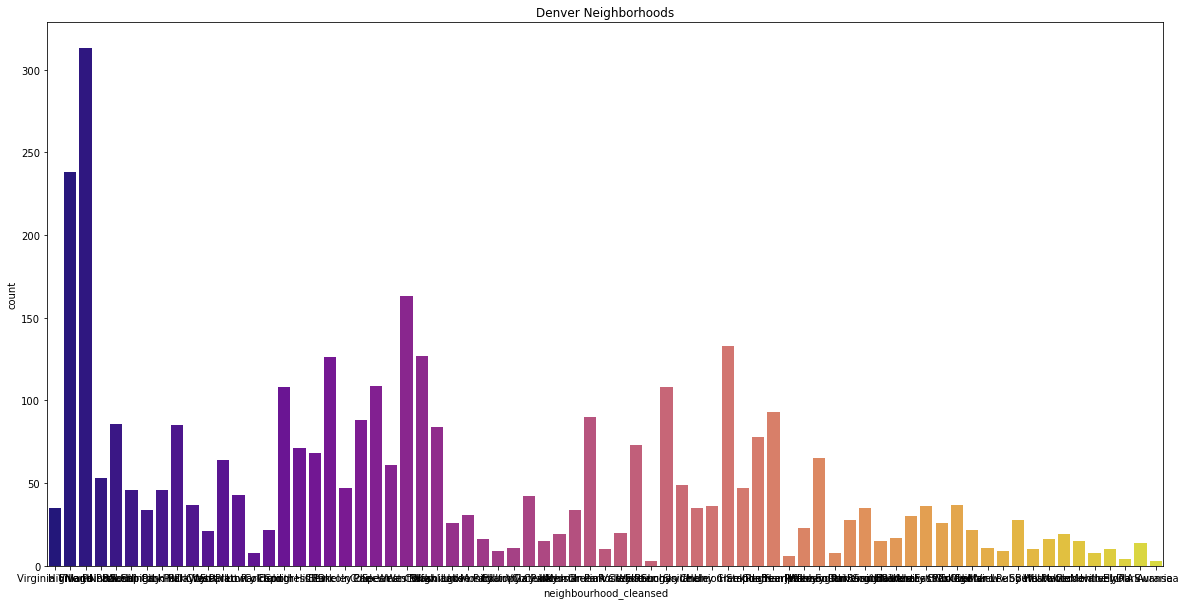

In [17]:
sns.countplot(denver['neighbourhood_cleansed'], palette = 'plasma')
fig = plt.gcf()
fig.set_size_inches(20,10)
plt.title('Denver Neighborhoods');

/Users/lmarett8/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


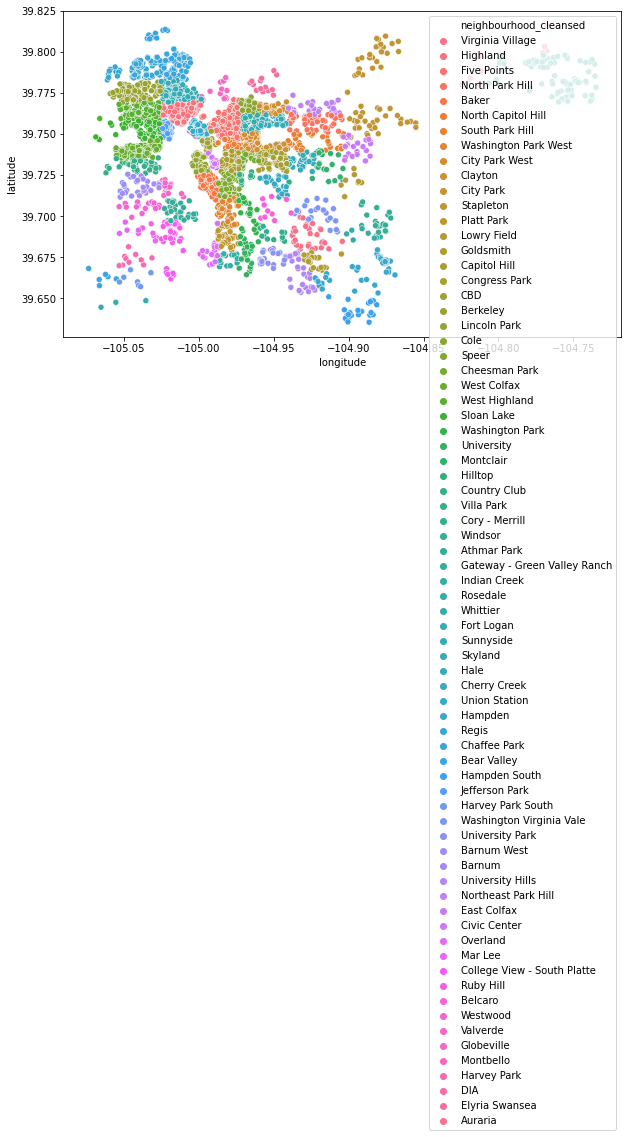

In [18]:
plt.figure(figsize = (10, 6))
sns.scatterplot(denver.longitude, denver.latitude, hue = denver.neighbourhood_cleansed)
plt.ioff();